In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import h5py
import pickle
import bluepyopt
from neuron import h

In [2]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

tick_major = 6
tick_minor = 4
plt.rcParams["xtick.major.size"] = tick_major
plt.rcParams["xtick.minor.size"] = tick_minor
plt.rcParams["ytick.major.size"] = tick_major
plt.rcParams["ytick.minor.size"] = tick_minor

font_small = 12
font_medium = 13
font_large = 14
plt.rc('font', size=font_small)          # controls default text sizes
plt.rc('axes', titlesize=font_medium)    # fontsize of the axes title
plt.rc('axes', labelsize=font_medium)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_small)    # legend fontsize
plt.rc('figure', titlesize=font_large)   # fontsize of the figure title

# Plot for GA result
def final_indv_plot(param_names, final_best_indv, title, file_path_to_save=None, max_xtic=1, vert_size=10):
    plt.figure(figsize=(cm_to_in(8.5), cm_to_in(vert_size)))
    ax = plt.gca()
    y_pos = np.arange(len(param_names))
    ax.barh(y_pos, final_best_indv, height=0.5, align='center', linestyle='-', color='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(param_names)
    ax.invert_yaxis()  # labels read top-to-bottom
    plt.axvline(x=0, color='black', linewidth=0.4 ,linestyle='--')
    ax.set_xlim(0, max_xtic)
    ax.set_xticks([0, max_xtic])
    ax.set_ylabel('Parameters')
    ax.set_xlabel('Normalized Distance')
    ax.set_title('Deviation From Truth Value ' + title)
    if file_path_to_save:
        plt.savefig(file_path_to_save+'.pdf', format='pdf', dpi=1000, bbox_inches="tight")

# Code for optimization results analysis
def read_and_normalize_with_neg(opt_result_path, base, lower_bounds, upper_bounds):
    with open(opt_result_path, 'rb') as f:
        best_indvs = pickle.load(f, encoding = "latin1")
    normalized_indvs = []
    for i in range(len(best_indvs)):
        normalized = []
        for j in range(len(best_indvs[i])):
            if (best_indvs[i][j] < base[j]):
                new_value = abs((best_indvs[i][j] - base[j])/(base[j]))
                normalized.append(new_value)
            else:
                new_value = abs((best_indvs[i][j] - base[j])/(base[j]))
                normalized.append(new_value)
        normalized_indvs.append(normalized)
    return normalized_indvs, best_indvs

def plot_stim_volts_pair(stim, volts, title_stim, title_volts, file_path_to_save=None):
    plt.figure(figsize=(cm_to_in(8.5+6), cm_to_in(12)))
    plt.subplot(2, 1, 1)
    plt.title(title_stim)
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (nA)')
    plt.plot(stim, color='black', linewidth=0.7)
    plt.subplot(2, 1, 2)
    plt.title('Voltage Response '+title_volts)
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (mV)')
    plt.plot(volts, label='response', color='crimson')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.tight_layout(pad=1)
    if file_path_to_save:
        plt.savefig(file_path_to_save+'.pdf', format='pdf', dpi=1000, bbox_inches="tight")

def cm_to_in(cm):
    return cm/2.54

# Running a single volt
def run_single_volts(param_set, stim_data, ntimestep = 10000, dt = 0.02):
    run_file = './run_model_cori.hoc'
    h.load_file(run_file)
    total_params_num = len(param_set)
    timestamps = np.array([dt for i in range(ntimestep)])
    h.curr_stim = h.Vector().from_python(stim_data)
    h.transvec = h.Vector(total_params_num, 1).from_python(param_set)
    h.stimtime = h.Matrix(1, len(timestamps)).from_vector(h.Vector().from_python(timestamps))
    h.ntimestep = ntimestep
    h.runStim()
    out = h.vecOut.to_python()
    return np.array(out)


In [3]:
# For overall params
#num_total_params_RmpRiTau = 44
RmpRiTau_params_base = [0.001511,\
                        0.000083,\
                        0.413603,\
                        0.000229,\
                        0.000049,\
                        0.000001,\
                        0.000022,\
                        3.999855,\
                        0.042115,\
                        0.000001,\
                        0.009017,\
                        0.001224,\
                        0.001693,\
                        0.386953,\
                        0.000008,\
                        0.000554,\
                        0.0004,\
                        0.039863,\
                        0.104239,\
                        0.000001,\
                        0.003242,\
                        0.000523,\
                        0.005446,\
                        0.503893,\
                        0.0001,\
                        0.000478,\
                        0.150747,\
                        0.000174]

params_RmpRiTau = ['gK_Tstbar_K_Tst_apical_basal',\
                'gSKv3_1bar_SKv3_1_apical_basal',\
                'gkbar_StochKv_apical_basal',\
                'gNaTs2_tbar_NaTs2_t_apical_basal',\
                'gIhbar_Ih_apical_basal',\
                'g_pas_apical_basal',\
                'gImbar_Im_apical_basal',\
                'gNaTa_tbar_NaTa_t_axonal',\
                'gK_Tstbar_K_Tst_axonal',\
                'gNap_Et2bar_Nap_Et2_axonal',\
                'gCa_LVAstbar_Ca_LVAst_axonal',\
                'gSK_E2bar_SK_E2_axonal',\
                'gK_Pstbar_K_Pst_axonal',\
                'gSKv3_1bar_SKv3_1_axonal',\
                'g_pas_axonal',\
                'gImbar_Im_axonal',\
                'gCabar_Ca_axonal',\
                'gK_Tstbar_K_Tst_somatic',\
                'gkbar_StochKv_somatic',\
                'gNap_Et2bar_Nap_Et2_somatic',\
                'gCa_LVAstbar_Ca_LVAst_somatic',\
                'gSK_E2bar_SK_E2_somatic',\
                'gK_Pstbar_K_Pst_somatic',\
                'gSKv3_1bar_SKv3_1_somatic',\
                'g_pas_somatic',\
                'gImbar_Im_somatic',\
                'gNaTs2_tbar_NaTs2_t_somatic',\
                'gCabar_Ca_somatic'] # RmpRiTau

print(len(params_RmpRiTau))

28


In [14]:
test_stim1_name = 'he_1_1_18'
test_stim2_name = 'chirp_f_0.12_to_0_a_3_to_3'
stims = h5py.File('./stims/stims_full.hdf5', 'r')
neg_stims = h5py.File('./stims/neg_stims.hdf5', 'r')
test_stim1 = stims[test_stim1_name][:]
test_stim2 = stims[test_stim2_name][:]

	1 
	1 
Setting temperature to 34.000000 C
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
/Users/kyunggeunkim/Desktop/bbp_new_model_pipeline/model_folder_L5_NBC_bSTUT213_1/
	1 
	1 
finshed run matrix
finshed run matrix


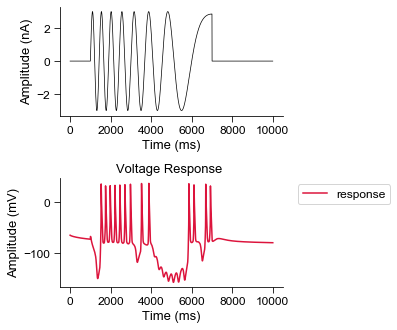

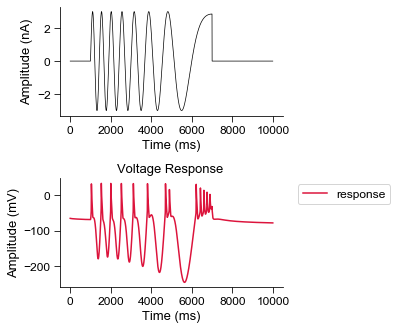

In [5]:
v1 = run_single_volts(RmpRiTau_params_base, test_stim1)
v2 = run_single_volts(RmpRiTau_params_base, test_stim2)
plot_stim_volts_pair(test_stim2, v1, '', '')
plot_stim_volts_pair(test_stim2, v2, '', '')

finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix
finshed run matrix


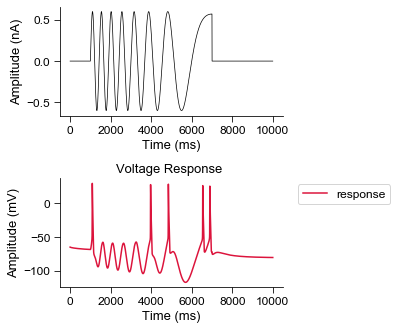

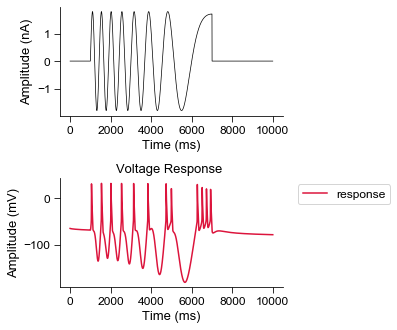

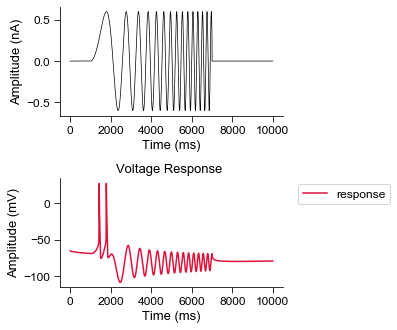

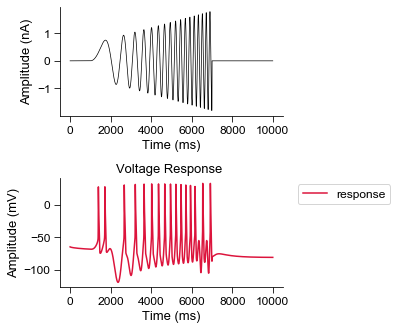

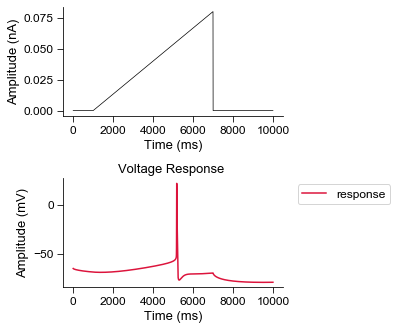

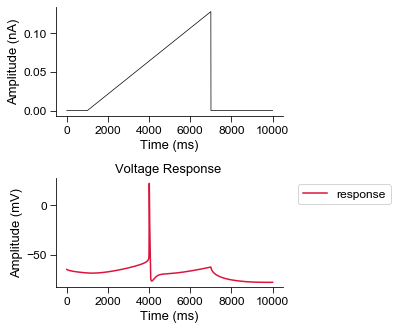

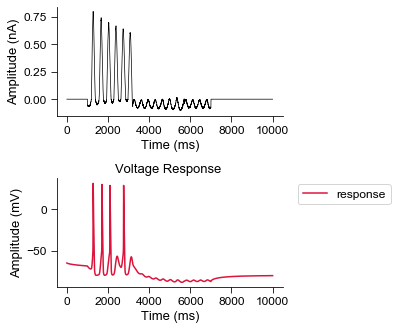

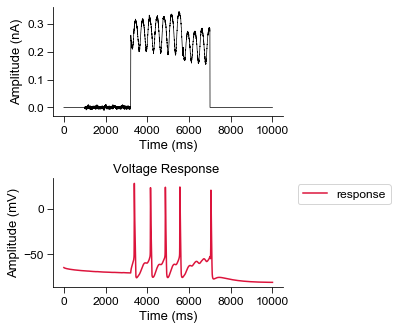

In [8]:
stim_names = ['chirp_f_0.12_to_0_a_3_to_3',\
    'chirp_f_0.12_to_0_a_9_to_9',\
    'chirp_f_0_to_0.24_a_3_to_3',\
    'chirp_f_0_to_0.28_a_3_to_9',\
    'ramp_0.4',\
    'ramp_0.64',\
    'he_3_15_13',\
    'he_3_15_18']

# Change this:
div_factor = 5

for s in stim_names:
    stim_v = stims[s][:]/div_factor
    volts_curr = run_single_volts(RmpRiTau_params_base, stim_v)
    plot_stim_volts_pair(stim_v, volts_curr, '', '')

In [10]:
stim_names = stims.keys()
neg_stim_names = neg_stims.keys()

In [15]:
div_factor = 5
stims_RmpRiTau = h5py.File('./stims/stims_full_RmpRiTau.hdf5', 'w')
neg_stims_RmpRiTau = h5py.File('./stims/neg_stims_RmpRiTau.hdf5', 'w')
for stim_name in stim_names:
    stim_values = stims[stim_name][:]
    rescaled_stim_values = stim_values/div_factor
    stims_RmpRiTau.create_dataset(stim_name, data=rescaled_stim_values)
stims_RmpRiTau.close()
for neg_stim_name in neg_stim_names:
    neg_stim_values = neg_stims[neg_stim_name][:]
    rescaled_neg_stim_values = neg_stim_values/div_factor
    neg_stims_RmpRiTau.create_dataset(neg_stim_name, data=rescaled_neg_stim_values)
neg_stims_RmpRiTau.close()